In [1]:
import numpy as np
import matplotlib.pylab as plt
from time import time

from rss.client import rssFromS3

### Authentication
If the bucket is public you don't need to define client_kwargs. Otherwise specify 
your keys in the "client_kwargs" dict.

In [2]:
client_kwargs = {'aws_access_key_id':'ABC...', 
                    'aws_secret_access_key':'XYZ...'}
rss = rssFromS3('gsh-competition-data/misc/rss/psdn11_TbsdmF_Near_Nov_11_32bit', client_kwargs)

Connection complete.


### Loading individual traces
You can load an individual trace by it's inline/xline coordinate. Understand that loading a 
single trace will also being down an entire line from storage, so it won't be faster than 
loading a line. However, neighbouring traces will be cached locally.

Elapsed Time :  0.9167969226837158
Elapsed Time :  0.07398605346679688


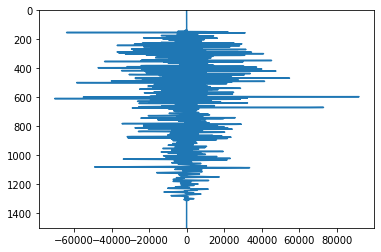

In [3]:
st = time()
trace, is_live = rss.trace(1337, 2000)
print ("Elapsed Time : ", time() - st)

st = time()
trace, is_live = rss.trace(1337, 2001)
print ("Elapsed Time : ", time() - st)

plt.figure()
plt.plot(trace, np.arange(len(trace)))
plt.ylim([len(trace),0])
plt.show()

### Getting slices:
The data is optimized for reads in the inline and crossline directions, 
and reads are cached.

Elapsed Time (loading) :  0.3216729164123535
Elapsed Time (loading):  0.11945390701293945
Elapsed Time (caching):  0.11918902397155762


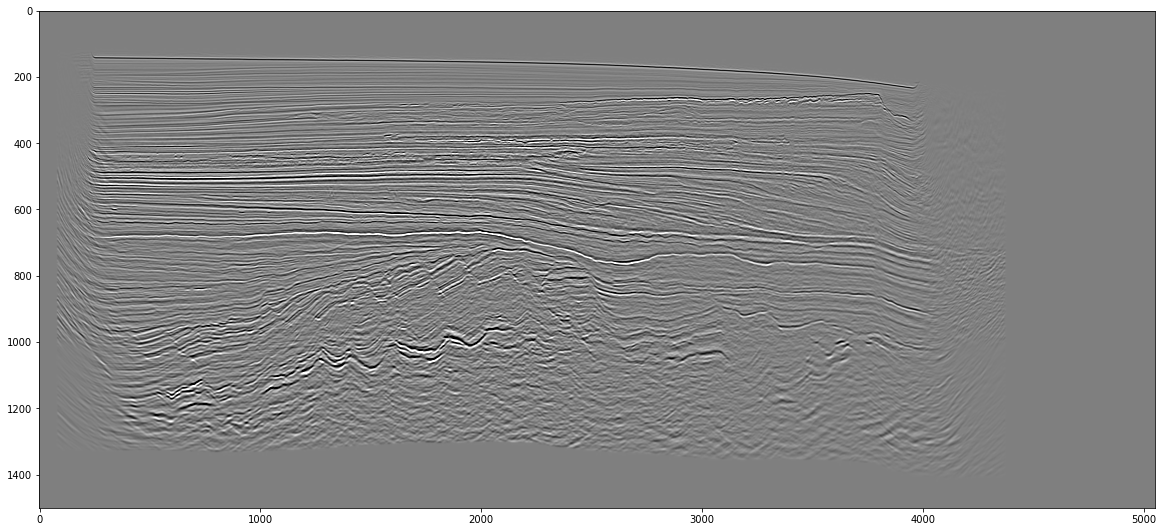

In [9]:
st = time()
inline, mask = rss.line(1100, sort_order='inline')
print ("Elapsed Time (loading) : ", time() - st)

st = time()
inline, mask = rss.line(1101, sort_order='inline')
print ("Elapsed Time (loading): ", time() - st)

st = time()
inline, mask = rss.line(1100, sort_order='inline')
print ("Elapsed Time (caching): ", time() - st)

plt.figure(figsize=(20,20))
plt.imshow(inline, cmap='gray', interpolation='bicubic',
           aspect=1.5,
           vmin=-2*np.std(inline[~mask]), vmax=2*np.std(inline[~mask]))
plt.show()

Elapsed Time (loading):  0.3242621421813965
Elapsed Time (loading):  0.10384202003479004
Elapsed Time (caching):  0.10116720199584961


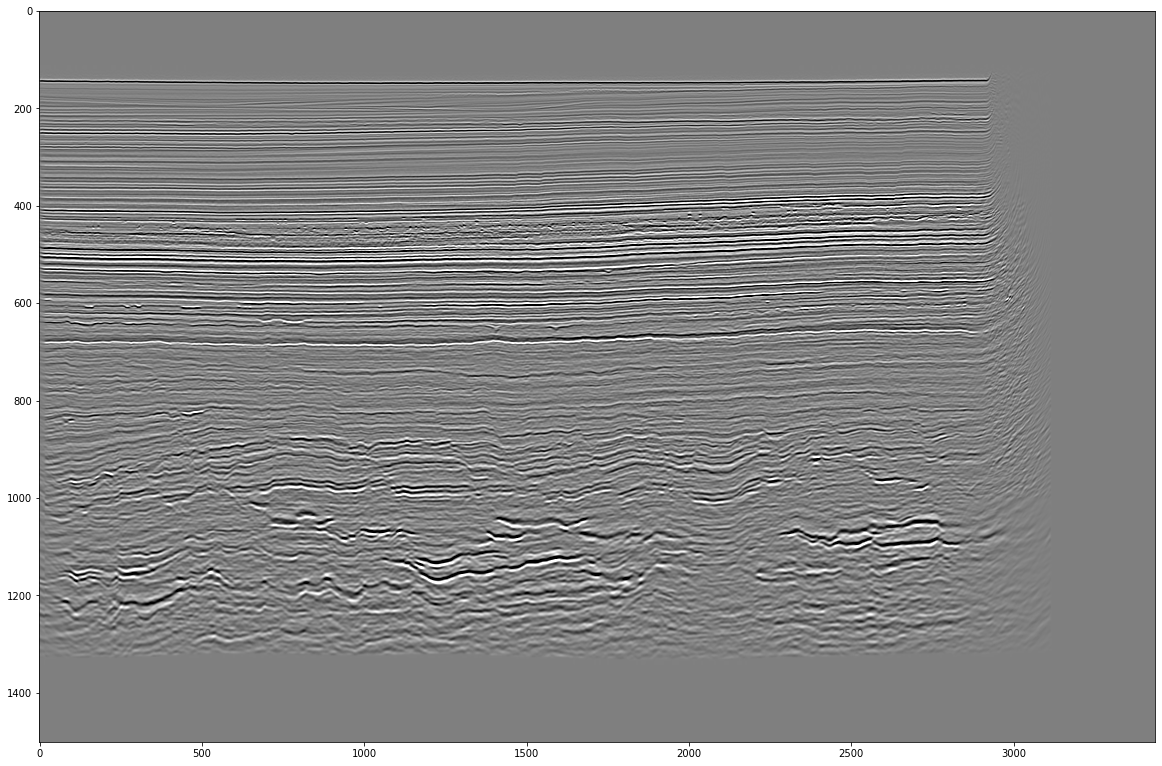

In [10]:
from time import time
st = time()
inline, mask = rss.line(1100, sort_order='crossline')
print ("Elapsed Time (loading): ", time() - st)

st = time()
inline, mask = rss.line(1101, sort_order='crossline')
print ("Elapsed Time (loading): ", time() - st)

st = time()
inline, mask = rss.line(1100, sort_order='crossline')
print ("Elapsed Time (caching): ", time() - st)

plt.figure(figsize=(20,20))
plt.imshow(inline, cmap='gray', aspect=1.5, interpolation='bicubic',
           vmin=-2*np.std(inline[~mask]), vmax=2*np.std(inline[~mask]))
plt.show()